# Applying the CRISP-DM Method to a Business Problem

CRISP-DM stands for cross-industry process for data mining. It provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

This model is an idealised sequence of events. In practice many of the tasks can be performed in a different order and it will often be necessary to backtrack to previous tasks and repeat certain actions.


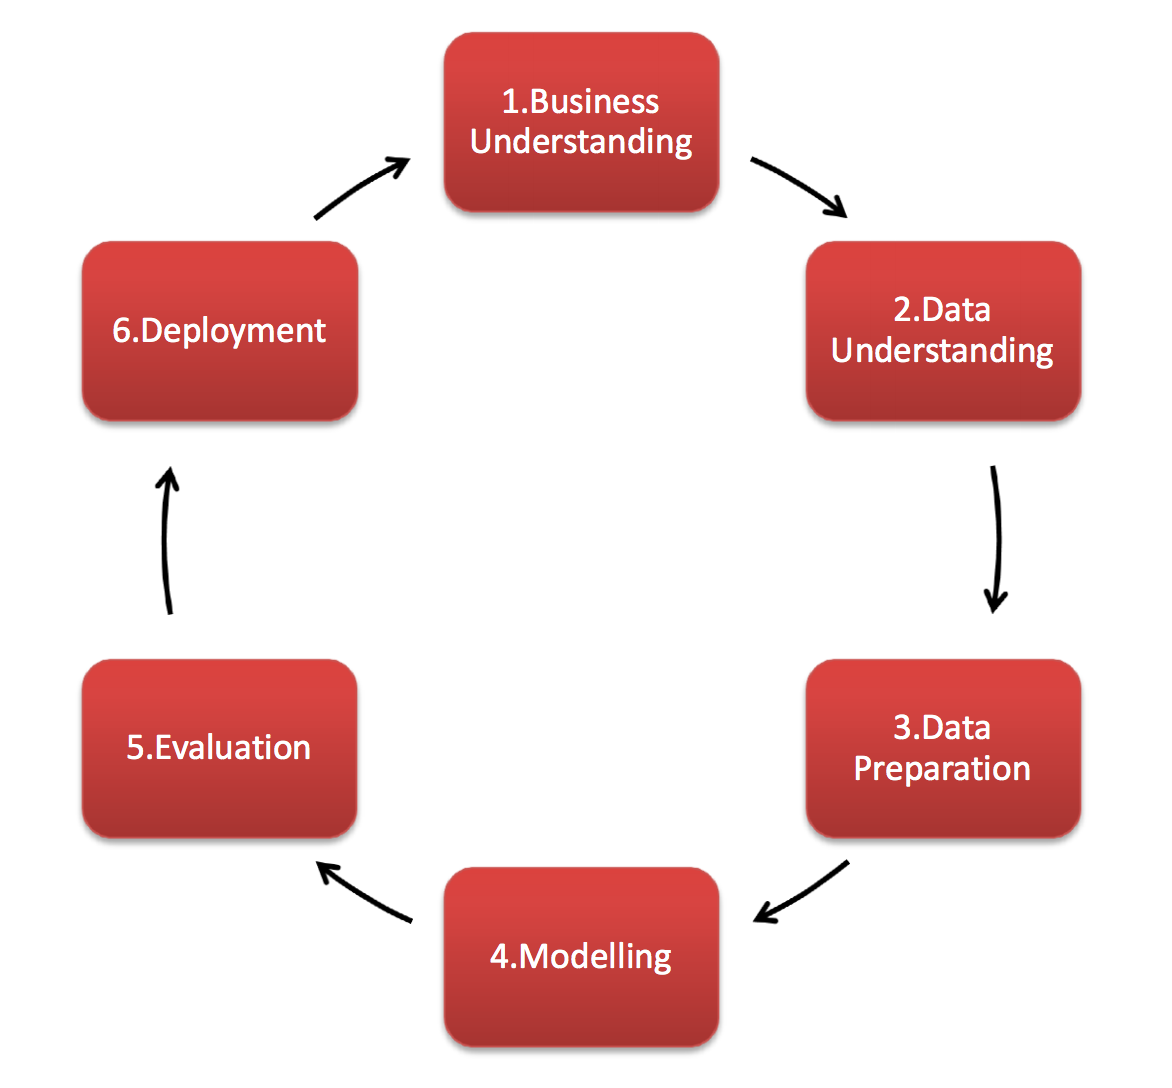

**Each phase of the process:**
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers) 
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

https://www.sv-europe.com/crisp-dm-methodology/


# 5. Stage Four - Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.



## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>

Probaremos con una red neuronal densa

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/#

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Preparación de datos

In [2]:
df = pd.read_csv('data_cleaned.csv', parse_dates=True, index_col='datetime')
validation_data = df.last('1W')
model_data = df[df.index[0]:validation_data.index[0]]


In [3]:
validation_data.info()
model_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25920 entries, 2017-09-03 22:00:00 to 2017-09-09 21:59:40
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iron_p               25920 non-null  float64
 1   silica_p             25920 non-null  float64
 2   starch_f             25920 non-null  float64
 3   amina_f              25920 non-null  float64
 4   ore_f                25920 non-null  float64
 5   ore_pH               25920 non-null  float64
 6   ore_density          25920 non-null  float64
 7   c1_air_f             25920 non-null  float64
 8   c2_air_f             25920 non-null  float64
 9   c3_air_f             25920 non-null  float64
 10  c4_air_f             25920 non-null  float64
 11  c5_air_f             25920 non-null  float64
 12  c6_air_f             25920 non-null  float64
 13  c7_air_f             25920 non-null  float64
 14  c1_level             25920 non-null  float64
 15  c

In [4]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit scaler on data
#scaler.fit(model_data)
#normalized = scaler.transform(model_data)


In [5]:
columns = df.columns
features = columns[:-2]
#print(type(normalized))
X = model_data.values[:,:-2]
y_1lag = model_data.values[:,-2]
y_2lag = model_data.values[:,-1]
input_length = len(features)
print(X.shape, y_1lag.shape)

(158085, 21) (158085,)


In [6]:
# Using Skicit-learn to split data into t=raining and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1lag, test_size = 0.3, random_state = 42)

In [7]:
# scale data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
%%time
# define the keras model
model = Sequential()
model.add(Dense(int(input_length*1.5), input_dim=input_length, activation='relu'))
model.add(Dense(input_length, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_absolute_error'])
model.compile(loss="mean_absolute_percentage_error", optimizer='adam')

CPU times: user 34.7 ms, sys: 0 ns, total: 34.7 ms
Wall time: 37.4 ms


In [16]:
%%time 
# fit the keras model on the dataset
#epochs = 1
epochs = 150
model.fit(X_train, y_train, epochs=epochs, batch_size=10)

Epoch 1/150
110659/110659 [==============================] - 44s 399us/step - loss: 27.0684
Epoch 2/150
110659/110659 [==============================] - 61s 550us/step - loss: 24.2942
Epoch 3/150
110659/110659 [==============================] - 42s 381us/step - loss: 23.2814
Epoch 4/150
110659/110659 [==============================] - 38s 341us/step - loss: 22.5421
Epoch 5/150
110659/110659 [==============================] - 38s 345us/step - loss: 21.9871
Epoch 6/150
110659/110659 [==============================] - 37s 338us/step - loss: 21.5225
Epoch 7/150
110659/110659 [==============================] - 41s 370us/step - loss: 21.0990
Epoch 8/150
110659/110659 [==============================] - 45s 404us/step - loss: 20.7689
Epoch 9/150
110659/110659 [==============================] - 46s 413us/step - loss: 20.4733
Epoch 10/150
110659/110659 [==============================] - 51s 464us/step - loss: 20.1999
Epoch 11/150
110659/110659 [==============================] - 60s 546us/step - 

In [17]:
import pickle
import datetime
filename = "kerasmodel"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
with open('./nn-models/{}.pickle'.format(filename), 'wb') as fout:
        pickle.dump(model, fout)

In [18]:
prediction = model.predict(X_test).flatten()
print(type(prediction), prediction.shape)
error = abs(y_test-prediction)
print(error.mean())
print((error/y_test).mean()*100)

<class 'numpy.ndarray'> (47426,)
0.4267753615641082
16.12306077699965


## Validation

In [19]:
columns = df.columns
features = columns[:-2]
#print(type(normalized))
X_val = validation_data.values[:,:-2]
y_val_1lag = validation_data.values[:,-2]
y_val_2lag = validation_data.values[:,-1]
X_val = scaler.fit_transform(X_val)

In [20]:
prediction_val = model.predict(X_val).flatten()
print(type(prediction_val), prediction_val.shape)
error_val = abs(y_val_1lag-prediction_val)
print(error_val.mean())
print((error_val/y_val_1lag).mean()*100)

<class 'numpy.ndarray'> (25920,)
1.248601338438584
45.48508498206058


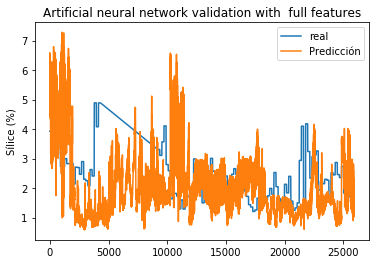

In [21]:
plt.plot(y_val_1lag, label='real')
plt.plot(prediction_val, label='Predicción')
plt.legend()
plt.title('Artificial neural network validation with  full features')
plt.ylabel('Sílice (%)')
plt.savefig('ann-full-validation.pdf')
plt.show()


## 

## 5.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- 
- 


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>
Run the modelling tool on the prepared dataset to create one or more models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Models** - These are the actual models produced by the modelling tool, not a report on the models.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

## 5.4. Assess Model <a class="anchor" id="AssessModel"></a>
Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. Judge the success of the application of modelling and discovery techniques technically, then contact business analysts and domain experts later in order to discuss the data mining results in the business context. This task only considers models, whereas the evaluation phase also takes into account all other results that were produced in the course of the project.

At this stage you should rank the models and assess them according to the evaluation criteria. You should take the business objectives and business success criteria into account as far as you can here. In most data mining projects a single technique is applied more than once and data mining results are generated with several different techniques. 

**Model assessment** - Summarise the results of this task, list the qualities of your generated models (e.g.in terms of accuracy) and rank their quality in relation to each other.

**Revised parameter settings** - According to the model assessment, revise parameter settings and tune them for the next modelling run. Iterate model building and assessment until you strongly believe that you have found the best model(s). Document all such revisions and assessments.